In [149]:
### Import Required Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
pd.set_option('max_columns', 17, 'max_rows', 20)

Read CSV File - "Training_Data_C.csv"

In [3]:
df = pd.read_csv('data/Training_Data_C.csv')
df.head()

,ID,Rate,Level_1,Region,Level_2,Criteria_1,Criteria_2,Type_1,Depth_1,Depth_2,Depth_3,Length_1,Radius_1,Ratio_1,Length_2,Level_3,Job_Status
0,0,170.69,0,6,2,1,0,0,10500,9375,5246,10,99,205.7,17.6,11,SomeObjectivesComplete
1,1,298.96,2,6,1,1,0,0,2625,6500,647,11,107,266.2,20.9,15,AllObjectivesComplete
2,2,155.54,2,0,0,0,0,2,10250,6125,3783,13,130,133.1,9.9,19,SomeObjectivesComplete
3,3,159.58,0,4,2,1,0,2,10625,5875,4407,12,109,330.0,20.9,11,SomeObjectivesComplete
4,4,171.70,2,1,2,1,1,2,2375,3000,645,13,72,137.5,18.7,21,AllObjectivesComplete


In [5]:
#Get Column Names & Indexes
columns = df.columns
index = df.index
columns

Index(['ID', 'Rate', 'Level_1', 'Region', 'Level_2', 'Criteria_1',
       'Criteria_2', 'Type_1', 'Depth_1', 'Depth_2', 'Depth_3', 'Length_1',
       'Radius_1', 'Ratio_1', 'Length_2', 'Level_3', 'Job_Status'],
      dtype='object')

In [6]:
index

RangeIndex(start=0, stop=6000, step=1)

In [7]:
#Get Datatypes
df.dtypes

ID              int64
Rate          float64
Level_1         int64
Region          int64
Level_2         int64
Criteria_1      int64
Criteria_2      int64
Type_1          int64
Depth_1         int64
Depth_2         int64
Depth_3         int64
Length_1        int64
Radius_1        int64
Ratio_1       float64
Length_2      float64
Level_3         int64
Job_Status     object
dtype: object

In [8]:
df.describe()

,ID,Rate,Level_1,Region,Level_2,Criteria_1,Criteria_2,Type_1,Depth_1,Depth_2,Depth_3,Length_1,Radius_1,Ratio_1,Length_2,Level_3
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,227.716620,1.008667,3.530833,0.989000,0.495000,0.494500,1.013333,6256.895833,6247.833333,3109.427333,11.995500,94.767000,219.597400,15.914433,12.531667
std,1732.195139,44.078009,0.815702,2.294833,0.816899,0.500017,0.500011,0.809690,3601.737493,3600.837585,2746.128308,1.399454,20.365285,64.080021,3.797248,7.524367
min,0.000000,151.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,125.000000,1.000000,10.000000,60.000000,110.000000,9.900000,0.000000
25%,1499.750000,188.870000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3125.000000,3125.000000,863.000000,11.000000,77.000000,162.800000,12.100000,6.000000
50%,2999.500000,228.260000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,6125.000000,6250.000000,2313.500000,12.000000,95.000000,218.900000,15.400000,13.000000
75%,4499.250000,264.872500,2.000000,6.000000,2.000000,1.000000,1.000000,2.000000,9375.000000,9375.000000,4755.000000,13.000000,112.000000,276.100000,18.700000,19.000000
max,5999.000000,303.000000,2.000000,7.000000,2.000000,1.000000,1.000000,2.000000,12500.000000,12500.000000,12343.000000,14.000000,130.000000,330.000000,22.000000,25.000000


In [9]:
#Check for any null values in the dataset. 
df.isnull().sum().sum()

0

NO NULL VALUES IN THE DATASET

In [13]:
#Round off Length_2 to its nearest round rumner
df['Length_2'] = df['Length_2'].round()

In [14]:
#Identified a few columns were assigned as integers, but I believe they are "Categories"
#So converting them to Categories
for col in ['Level_1', 'Region', 'Level_2', 'Criteria_1','Criteria_2','Type_1','Depth_1',
            'Depth_2','Length_1','Level_3','Length_2','Job_Status']:
    df[col] = df[col].astype('category')

In [15]:
with pd.option_context('display.max_rows', 10):
    display(df.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
ID,6000.0,2999.500000,1732.195139,0.0,1499.75,2999.50,4499.2500,5999.0
Rate,6000.0,227.716620,44.078009,151.5,188.87,228.26,264.8725,303.0
Depth_3,6000.0,3109.427333,2746.128308,1.0,863.00,2313.50,4755.0000,12343.0
Radius_1,6000.0,94.767000,20.365285,60.0,77.00,95.00,112.0000,130.0
Ratio_1,6000.0,219.597400,64.080021,110.0,162.80,218.90,276.1000,330.0


In [17]:
#Check if ID is a unique field. If so, drop it!

df['ID'].nunique()

6000

In [18]:
df.drop('ID', axis=1, inplace=True)

In [16]:
df.describe(include=[pd.Categorical]).T

,count,unique,top,freq
Level_1,6000,3,2,2022
Region,6000,8,3,786
Level_2,6000,3,0,2035
Criteria_1,6000,2,0,3030
Criteria_2,6000,2,0,3033
Type_1,6000,3,1,2066
Depth_1,6000,100,3625,79
Depth_2,6000,100,1750,79
Length_1,6000,5,11,1247
Length_2,6000,12,13,513


In [19]:
### Get Value counts for Job_Status

df['Job_Status'].value_counts()

### Not a very balanced dataset at the same time, 
### unbalanced rate isn't bad. Let's not only evaluate
### Accuracy, but also consider Precision and Recall as 
### performance metrics

SeveralObjectivesComplete    2228
SomeObjectivesComplete       1960
AllObjectivesComplete        1279
NoObjectiveComplete           533
Name: Job_Status, dtype: int64

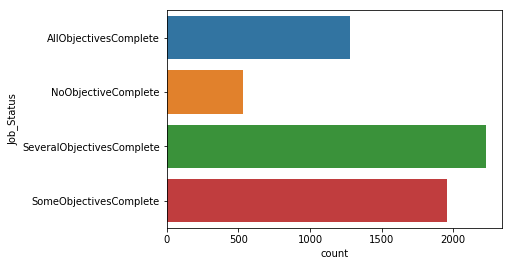

In [20]:
sns.countplot(y='Job_Status', data=df)

Rate(Unique values) 151


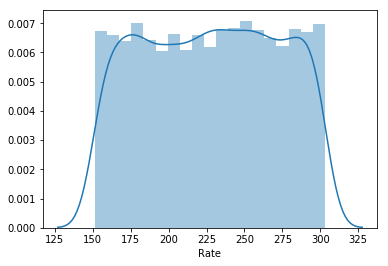

In [22]:
#Check distribution of numeric variables

sns.distplot(df['Rate'])
print("Rate(Unique values)",df['Rate'].nunique())

### Looks like a Uniform distribution. Ideally prefer
### a Gausian dist, but would leave the distribution 
### as it is and, incase if the prediction accuracy isn't
### good enough, I would convert this into a Gaussian distribution

Depth3(Unique values): 4072


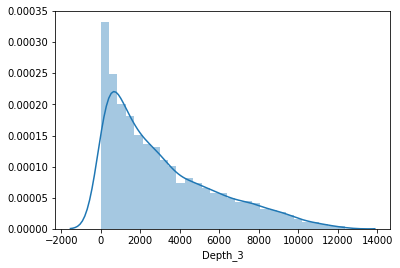

In [24]:
sns.distplot(df['Depth_3'])
print("Depth3(Unique values):",df['Depth_3'].nunique())

### Looks like a Right Skew Distribution. Ideally prefer
### a Gausian dist, but would leave the distribution 
### as it is and, incase if the prediction accuracy isn't
### good enough, I would convert this into a Gaussian distribution

Radius_1(Unique values): 71


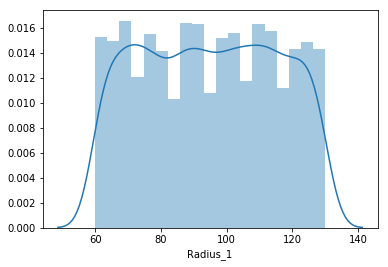

In [25]:
sns.distplot(df['Radius_1'])
print("Radius_1(Unique values):",df['Radius_1'].nunique())

### Looks like a Uniform distribution. Ideally prefer
### a Gausian dist, but would leave the distribution 
### as it is and, incase if the prediction accuracy isn't
### good enough, I would convert this into a Gaussian distribution

Ratio_1(Unique values): 201


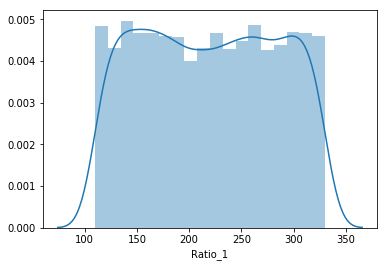

In [29]:
sns.distplot(df['Ratio_1'])
print("Ratio_1(Unique values):",df['Ratio_1'].nunique())

### Looks like a Uniform distribution. Ideally prefer
### a Gausian dist, but would leave the distribution 
### as it is and, incase if the prediction accuracy isn't
### good enough, I would convert this into a Gaussian distribution

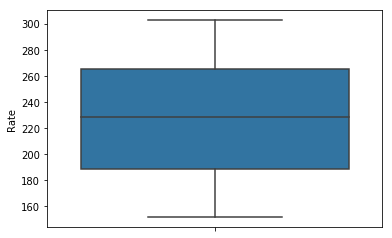

In [26]:
sns.boxplot(y=df['Rate'])

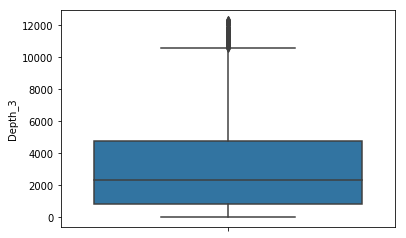

In [27]:
sns.boxplot(y=df['Depth_3'])

### As expected, (Right Skewed Dist) this variable
### has outliers. Leave as it is and, incase if the 
### prediction accuracy isn't
### good enough, I would convert this into a Gaussian distribution

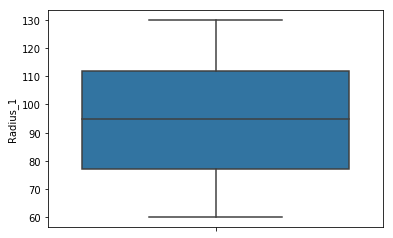

In [28]:
sns.boxplot(y=df['Radius_1'])

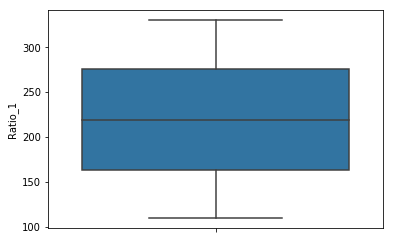

In [30]:
sns.boxplot(y=df['Ratio_1'])

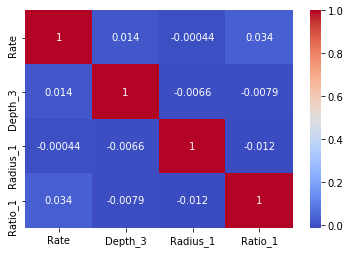

In [31]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### Correlation Plot below doenst should any correlated
### variables. So, the numeric variables are "independent" 
### are independent of each other

In [32]:
#Get the dependent variable assigned to 'y'

y = df['Job_Status'] 

In [35]:
y.shape

(6000,)

In [33]:
dfbackup = df.copy()

In [34]:
df.drop('Job_Status', axis=1, inplace=True)
X = df

In [36]:
X.shape

(6000, 15)

In [38]:
### Create a BASELINE Classifier (with no Cross Validation)
### I chose Logistic Refression as my baseline classifier in this case

logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print("Base Accuracy Score:", metrics.accuracy_score(y, y_pred))

### BaseLine Accuracy: 0.786

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Score: 0.7861666666666667


In [39]:
#Mapping Categorical Data to Category Codes, so the columns shall be treated as integers
cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

In [40]:
X.dtypes

Rate          float64
Level_1          int8
Region           int8
Level_2          int8
Criteria_1       int8
Criteria_2       int8
Type_1           int8
Depth_1          int8
Depth_2          int8
Depth_3         int64
Length_1         int8
Radius_1        int64
Ratio_1       float64
Length_2         int8
Level_3          int8
dtype: object

In [41]:
y = y.cat.codes
y

0       3
1       0
2       3
3       3
4       0
5       0
6       0
7       2
8       2
9       3
       ..
5990    0
5991    0
5992    3
5993    2
5994    3
5995    0
5996    2
5997    2
5998    3
5999    3
Length: 6000, dtype: int8

KNN: 1 KNN Accuracy Score: 1.0
KNN: 2 KNN Accuracy Score: 0.7936666666666666
KNN: 3 KNN Accuracy Score: 0.787
KNN: 4 KNN Accuracy Score: 0.7551666666666667
KNN: 5 KNN Accuracy Score: 0.7426666666666667
KNN: 6 KNN Accuracy Score: 0.7331666666666666
KNN: 7 KNN Accuracy Score: 0.7233333333333334
KNN: 8 KNN Accuracy Score: 0.7133333333333334
KNN: 9 KNN Accuracy Score: 0.7011666666666667
KNN: 10 KNN Accuracy Score: 0.6951666666666667
KNN: 11 KNN Accuracy Score: 0.6858333333333333
KNN: 12 KNN Accuracy Score: 0.678
KNN: 13 KNN Accuracy Score: 0.675
KNN: 14 KNN Accuracy Score: 0.672
KNN: 15 KNN Accuracy Score: 0.6711666666666667
KNN: 16 KNN Accuracy Score: 0.6656666666666666
KNN: 17 KNN Accuracy Score: 0.6591666666666667
KNN: 18 KNN Accuracy Score: 0.6553333333333333
KNN: 19 KNN Accuracy Score: 0.6475
KNN: 20 KNN Accuracy Score: 0.6476666666666666
KNN: 21 KNN Accuracy Score: 0.6438333333333334
KNN: 22 KNN Accuracy Score: 0.6378333333333334
KNN: 23 KNN Accuracy Score: 0.6351666666666667
KNN: 24

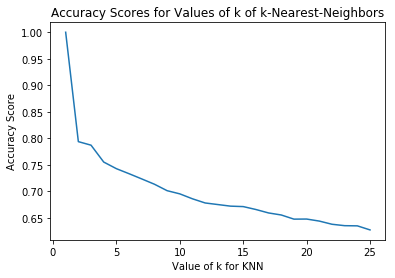

In [152]:
### Experimenting another classifier
### Chose KNN with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    print("KNN:",k,"KNN Accuracy Score:", metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

### The elbow point for this classifer is KNN with 25 Neighbours, 
### the accuracy is still declining. I believe KNN may not be the right
### model for this dataset (will test with cross validation too)
### KNN's is overfitting the data with no good accuracy!!!

In [45]:
### Splitting the training and testing data
### 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [46]:
### Re-evaluate the Logistic Regression BaseLine Classifier to ensure, the training data
### generated from the dataset isn't too different from the full dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Base Line Accuracy Test:",metrics.accuracy_score(y_test, y_pred))

### The BaseLine Accuracy hasn't changed with the training dataset.
### Hence, we shall proceed to spot check various classification algorithms

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Base Line Accuracy Test: 0.7941666666666667


In [47]:
### Spot-Check Algorithms
### Algorithms chosen: Logistic, LDA, KNN, Decistion Trees (CART), NB and SVM
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

### CART has a good prediction accuracy of 89%

LR: 0.799167 (0.022673)
LDA: 0.881250 (0.012910)
KNN: 0.577500 (0.015417)
CART: 0.896875 (0.016490)
NB: 0.744583 (0.021311)
SVM: 0.366250 (0.018629)


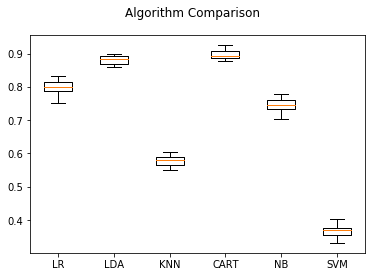

In [48]:
### Compare Algorithms visually

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### As mentioned earlier, CART is the best performing algorithm as of now

In [49]:
### Evaluate Ensemble Models
### Ensemble Models: Random Forest, Extra Trees, Adaboot, GradientBoosting
models = []
models.append(('RF',RandomForestClassifier(n_estimators=10)))
models.append(('Extra', ExtraTreesClassifier(n_estimators=10, max_depth=None,
                min_samples_split=2, random_state=5)))
models.append(('Ada', AdaBoostClassifier(n_estimators=100)))
models.append(('GradientBC', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=5)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

### GradientBC has excellent prediction accuracy of 94.9%
### Let's tune GradientBC manually, check accuracy and evaluate
### precision and recall

RF: 0.867292 (0.022049)
Extra: 0.792083 (0.021078)
Ada: 0.662500 (0.061031)
GradientBC: 0.949167 (0.011829)


In [155]:
### Manual Hyperparameter Tuning - GradientBC
param_test1 = {'n_estimators':range(50,500,50)}
learning_rate = 0.1
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=learning_rate, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt'),
param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=True,cv=5)

grid_result  = grid.fit(X_train,y_train)
predictions = grid_result.predict(X_test)
print("GradientBC Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

### Precision, Recall and Accuracy metrics tally each other
### In other words, the accuracy results can be trusted for this dataset as
### Precision and Recall values are close the accuracy results
### The accuracy has goine down a little bit, that may be due to model tuning.
### I will perform an extensive Grid Tuning, to identify the right parameters in the
### next section..

GradientBC Accuracy: 0.9433333333333334
Confusion Matrix: [[230   0  16   0]
 [  0 110   0  14]
 [  6   0 451  13]
 [  0   1  18 341]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       246
           1       0.99      0.89      0.94       124
           2       0.93      0.96      0.94       470
           3       0.93      0.95      0.94       360

   micro avg       0.94      0.94      0.94      1200
   macro avg       0.96      0.93      0.94      1200
weighted avg       0.94      0.94      0.94      1200



In [53]:
### Extensice Hyperparameter Grid Search/Tuning 

param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [6, 8],
              'min_samples_leaf': [50,100,150],
              'max_features': [8,10] ,
              'n_estimators':range(50,500,50),
              'min_samples_split':[400,500]
              }

# Tune GradientBC
param_test1 = {'n_estimators':range(50,500,50)}
learning_rate = [0.1, 0.05, 0.02, 0.01]
grid = GridSearchCV(estimator = GradientBoostingClassifier(verbose=True),param_grid = param_grid, scoring='accuracy',n_jobs=4,iid=True,cv=5)

grid_result  = grid.fit(X_train,y_train)

predictions = grid_result.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

### After several hours(4 hours) of Grid search, I identified, the model to have
### Accuracy improved slightly along with good precision and recall metrics
### I would use this model to predict the validation data

      Iter       Train Loss   Remaining Time 
         1        5868.6534           13.60m
         2        5347.8088            7.81m
         3        4918.1691            5.43m
         4        4556.7249            4.16m
         5        4271.4930            3.53m
         6        3994.4488            2.99m
         7        3769.4124            2.74m
         8        3562.9932            2.42m
         9        3354.2708            2.16m
        10        3188.0922            1.95m
        20        2094.4622            1.01m
        30        1520.7664           40.99s
        40        1163.4238           31.15s
        50         951.8337           24.79s
        60         799.7431           20.38s
        70         686.1914           17.17s
        80         600.7303           14.72s
        90         531.9178           12.73s
       100         470.6221           11.10s
       200         183.5114            2.43s
0.955
[[237   0   9   0]
 [  0 113   0  11]
 [  7   0 

In [63]:
### Read Validation data
df_validation = pd.read_csv('data/Validation_Data_C.csv')
df_validation.head()

,ID,Rate,Level_1,Region,Level_2,Criteria_1,Criteria_2,Type_1,Depth_1,Depth_2,Depth_3,Length_1,Radius_1,Ratio_1,Length_2,Level_3,Job_Status
0,0,301.99,0,1,0,0,0,1,11625,9125,1510,14,93,156.2,12.1,5,NaN
1,1,264.62,1,2,2,0,1,2,7625,10625,455,14,75,282.7,22.0,24,NaN
2,2,296.94,0,3,1,1,0,1,3000,10500,1080,14,91,146.3,11.0,13,NaN
3,3,203.01,1,0,1,1,0,0,2500,11250,1074,14,71,275.0,11.0,14,NaN
4,4,267.65,1,7,1,0,1,1,4250,5000,3670,14,61,253.0,9.9,21,NaN


In [64]:
### Remove ID and Job_Status
df_validation.drop(['ID','Job_Status'], axis=1, inplace=True)

In [65]:
for col in ['Level_1', 'Region', 'Level_2', 'Criteria_1','Criteria_2','Type_1','Depth_1',
            'Depth_2','Length_1','Level_3','Length_2']:
    df_validation[col] = df_validation[col].astype('category')

In [66]:
X_Validation = df_validation

In [67]:
### Mapping Categorical Data to Category Codes, so the columns shall be treated as integers
cat_columns = X_Validation.select_dtypes(['category']).columns
X_Validation[cat_columns] = X_Validation[cat_columns].apply(lambda x: x.cat.codes)

In [68]:
X_Validation.dtypes

Rate          float64
Level_1          int8
Region           int8
Level_2          int8
Criteria_1       int8
Criteria_2       int8
Type_1           int8
Depth_1          int8
Depth_2          int8
Depth_3         int64
Length_1         int8
Radius_1        int64
Ratio_1       float64
Length_2         int8
Level_3          int8
dtype: object

In [69]:
#predictions_New = grid_result.predict(X_Validation)
X_Validation

,Rate,Level_1,Region,Level_2,Criteria_1,Criteria_2,Type_1,Depth_1,Depth_2,Depth_3,Length_1,Radius_1,Ratio_1,Length_2,Level_3
0,301.99,0,1,0,0,0,1,55,42,1510,4,93,156.2,2,5
1,264.62,1,2,2,0,1,2,37,50,455,4,75,282.7,11,24
2,296.94,0,3,1,1,0,1,15,49,1080,4,91,146.3,1,13
3,203.01,1,0,1,1,0,0,14,53,1074,4,71,275.0,1,14
4,267.65,1,7,1,0,1,1,22,20,3670,4,61,253.0,0,21
5,212.10,0,7,1,0,1,0,24,28,371,0,66,250.8,5,12
6,203.01,2,7,0,1,1,2,49,34,58,0,119,158.4,8,10
7,237.35,1,1,2,0,0,2,40,27,1611,3,129,266.2,3,7
8,266.64,1,2,1,1,0,2,9,0,1306,3,87,259.6,0,18
9,250.48,1,5,2,0,0,2,6,2,787,3,105,136.4,10,6


In [81]:
newPredictions = pd.DataFrame() 

In [126]:
### perform predictions using the latest "Tuned Hyperparameter Model"
numpyPredctions = grid_result.predict(X_Validation)

In [127]:
### Assign it to the validation dataset
newPredictions['Job_status'] = numpyPredctions

In [128]:
newPredictions = newPredictions.astype('category')

In [129]:
newPredictions.dtypes

Job_status    category
dtype: object

In [108]:

#newPredictions[newPredictions['Job_status']==0]['Decoded_Job_Status'] = 'SeveralObjectivesComplete'

In [130]:
newPredictions_backup = newPredictions.copy()

In [131]:
Code_nums = {"Job_status":     {0:"SeveralObjectivesComplete", 1:"SomeObjectivesComplete",
                                2:"AllObjectivesComplete",3:"NoObjectiveComplete"}
                }

In [132]:
### Decode the Job_Status column
newPredictions.replace(Code_nums, inplace=True)
newPredictions.head()

,Job_status
0,AllObjectivesComplete
1,AllObjectivesComplete
2,SeveralObjectivesComplete
3,SeveralObjectivesComplete
4,SeveralObjectivesComplete


In [145]:
df_validation_new = pd.read_csv('data/Validation_Data_C.csv')

In [146]:
df_validation_new['Job_Status'] = newPredictions['Job_status']

In [148]:
### Save the results to the CSV file
df_validation_new.to_csv("FinalPredictions.csv")

Final Thoughts:

1. The given dataset was clean (no null values) with less outliers
2. Identified a few distributions to be non-normal (Uniform distrubution)
3. If the accuracy/performance metrics were poor, I would have transformed
    the Uniform distribution to Normal and tested the evaluation results.
    However, in this case we have a good peformance metrics, so the additional 
    steps weren't necessary.
4. Dataset was split to 80/20 and 10-Fold Cross Validation was perfomed on the
    following models: Logistic Regression, LDA, KNN, CART, SVM, RF, ExtraTrees, 
    GradientBoosting and AdaBoost
5. GradientBoosting had a good accuracy along with other performance metrics 
    such as Precision and Recall
6. After extensive hyperparameter tuning, the accuracy was identified to be 95.5%
    and validation data were predicted using this model
7. The results are stored in "FinalPredictions.csv"